In [1]:
# Import necessary libraries
import yfinance as yf
import streamlit as st
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import mplfinance as mpf


In [2]:
# define start date 
start_date = "2014-01-01"

# define end date
end_date = "2024-12-31"

In [11]:
# User inputs ticker and the function outputs to dataframe
def get_crypto_price_history(start_date,end_date):
    """
    fetches historical crypto data for a given crypto symbol and date
    args: 
        ticker: crypto ticker symbol
        start date: the start is in "YYYY-MM-DD" format
        end date: the end date is in "YYYY-MM-DD" format
    
    returns: 
        dataframe containing historical crypto price
    
    """
    global crypto_ticker
    # allow user to input the ticker symbol
    crypto_ticker = input()
    # create a ticker object for the given ticker symbol
    crypto=yf.Ticker(crypto_ticker)
    # fetch historical data for the especified date range
    history = crypto.history(start=start_date,end=end_date)
    return history

In [13]:
crypto_ticker

'BTC-USD'

In [12]:
data = get_crypto_price_history(start_date,end_date)

In [5]:
data_6_months = data.tail(110)

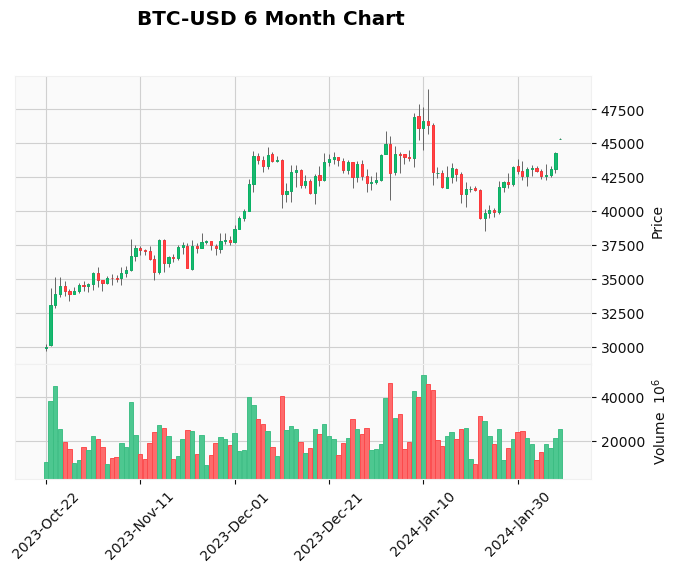

In [15]:
# MPF plot
mpf.plot(data_6_months, type='candle', volume=True, style='yahoo', title= f"{crypto_ticker} 6 Month Chart")

In [16]:
def plot_candlestick(data, title):
    """
    This function plots a candlestick chart for the given data
    args:
        data: the dataframe containing historical crypto price
        title: the title of the plot
    """
    # # create a figure and axis
    # fig, ax = plt.subplots()
    # # plot the candlestick chart
    # ax.plot(data.index, data['Close'], label='Close Price')
    # # set the title of the plot
    # ax.set_title(title)
    # # set the x-axis label
    # ax.set_xlabel('Date')
    # # set the y-axis label
    # ax.set_ylabel('Price ($)')
    # # rotate the x-axis labels
    # plt.xticks(rotation=45)
    # # show the legend
    # plt.legend()
    # # display the plot
    # plt.show() 
  # set fig
    data['EMA_8'] = data['Close'].ewm(span=8, adjust=False).mean()
    data['EMA_21'] = data['Close'].ewm(span=21, adjust=False).mean()
    data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()


    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.10, subplot_titles=(f"{crypto_ticker} Candlestick Chart", 'Volume'),
                        row_width=[0.2, 0.7])
    # Volume
    fig.add_trace(go.Bar(x=data.index, y=data['Volume'], marker_color='lime', showlegend=False), row=2, col=1)

    # Candlestick chart
    fig.add_trace(go.Candlestick(x=data.index,
                                open=data["Open"],
                                high=data["High"],
                                low=data["Low"],
                                close=data["Close"],
                                increasing_line_color= 'green', 
                                decreasing_line_color= 'red',
                                name="OHLC"),
                row=1, col=1)
#Add EMAS
    fig.add_trace(go.Scatter(x=data.index, y=data['EMA_8'], mode='lines', line=dict(color='blue'), name='EMA 8'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['EMA_21'], mode='lines', line=dict(color='orange'), name='EMA 21'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=data['EMA_200'], mode='lines', line=dict(color='purple'), name='EMA 200'), row=1, col=1)

    fig.update_layout(
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($)',
            titlefont_size=18,
            tickfont_size=12,
            color = 'white'
        ),
        xaxis=dict(
            color = 'white'
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='gainsboro',
        plot_bgcolor = 'black'
    )
    # Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=False)

    fig.show()
    return fig

In [17]:
plot_candlestick(data_6_months, 'Bitcoin 6 Month Candlestick Chart');